In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: MPW
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


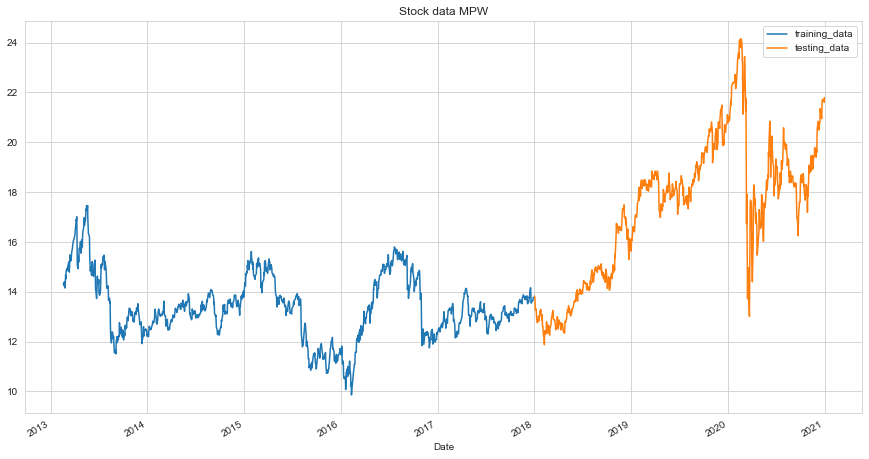

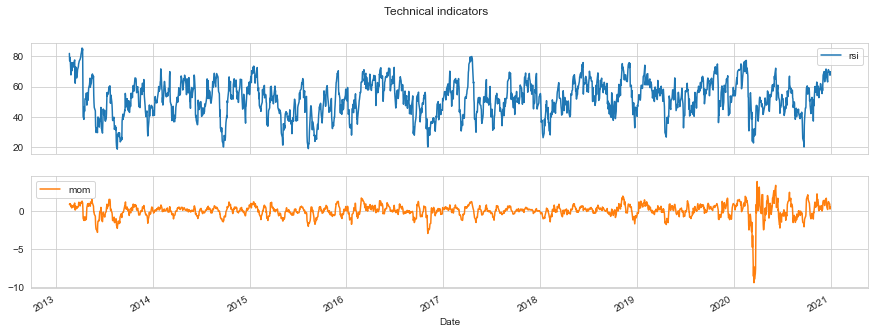

In [2]:
stock_name = 'mpw'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1129.43, duration: 0:00:00.227050
episode: 2/2000, episode end value: 1067.32, duration: 0:00:00.260062
episode: 3/2000, episode end value: 1074.19, duration: 0:00:00.258059
episode: 4/2000, episode end value: 1094.50, duration: 0:00:00.228702
episode: 5/2000, episode end value: 1126.01, duration: 0:00:00.253542
episode: 6/2000, episode end value: 1133.99, duration: 0:00:00.225319
episode: 7/2000, episode end value: 1088.55, duration: 0:00:00.209038
episode: 8/2000, episode end value: 1099.77, duration: 0:00:00.239359
episode: 9/2000, episode end value: 1133.82, duration: 0:00:00.236469
episode: 10/2000, episode end value: 1176.76, duration: 0:00:00.208193
episode: 11/2000, episode end value: 1068.91, duration: 0:00:00.215488
episode: 12/2000, episode end value: 1114.54, duration: 0:00:00.188683
episode: 13/2000, episode end value: 1090.66, duration: 0:00:00.205792
episode: 14/2000, episode end value: 1098.64, duration: 0:00:00.229143
episode: 15/200

episode: 117/2000, episode end value: 1080.47, duration: 0:00:00.295194
episode: 118/2000, episode end value: 1094.48, duration: 0:00:00.282935
episode: 119/2000, episode end value: 1129.88, duration: 0:00:00.247456
episode: 120/2000, episode end value: 1073.20, duration: 0:00:00.251118
episode: 121/2000, episode end value: 1064.53, duration: 0:00:00.228475
episode: 122/2000, episode end value: 1143.82, duration: 0:00:00.260045
episode: 123/2000, episode end value: 1069.62, duration: 0:00:00.252460
episode: 124/2000, episode end value: 1083.94, duration: 0:00:00.255067
episode: 125/2000, episode end value: 1072.64, duration: 0:00:00.233832
episode: 126/2000, episode end value: 1147.40, duration: 0:00:00.312241
episode: 127/2000, episode end value: 1071.62, duration: 0:00:00.258055
episode: 128/2000, episode end value: 1071.13, duration: 0:00:00.262061
episode: 129/2000, episode end value: 1077.78, duration: 0:00:00.267062
episode: 130/2000, episode end value: 1068.55, duration: 0:00:00

episode: 231/2000, episode end value: 1120.09, duration: 0:00:00.250431
episode: 232/2000, episode end value: 1078.86, duration: 0:00:00.251406
episode: 233/2000, episode end value: 1134.00, duration: 0:00:00.249487
episode: 234/2000, episode end value: 1085.22, duration: 0:00:00.260079
episode: 235/2000, episode end value: 1086.29, duration: 0:00:00.270060
episode: 236/2000, episode end value: 1124.08, duration: 0:00:00.254908
episode: 237/2000, episode end value: 1073.57, duration: 0:00:00.235350
episode: 238/2000, episode end value: 1132.41, duration: 0:00:00.255319
episode: 239/2000, episode end value: 1086.85, duration: 0:00:00.276229
episode: 240/2000, episode end value: 1076.40, duration: 0:00:00.264043
episode: 241/2000, episode end value: 1079.24, duration: 0:00:00.264776
episode: 242/2000, episode end value: 1075.69, duration: 0:00:00.241482
episode: 243/2000, episode end value: 1067.09, duration: 0:00:00.262251
episode: 244/2000, episode end value: 1106.19, duration: 0:00:00

episode: 345/2000, episode end value: 1079.70, duration: 0:00:00.291765
episode: 346/2000, episode end value: 1120.80, duration: 0:00:00.293159
episode: 347/2000, episode end value: 1069.04, duration: 0:00:00.280212
episode: 348/2000, episode end value: 1071.77, duration: 0:00:00.338287
episode: 349/2000, episode end value: 1092.22, duration: 0:00:00.439082
episode: 350/2000, episode end value: 1077.44, duration: 0:00:00.291267
episode: 351/2000, episode end value: 1070.60, duration: 0:00:00.286318
episode: 352/2000, episode end value: 1106.49, duration: 0:00:00.282698
episode: 353/2000, episode end value: 1076.04, duration: 0:00:00.294470
episode: 354/2000, episode end value: 1086.22, duration: 0:00:00.259763
episode: 355/2000, episode end value: 1132.75, duration: 0:00:00.288387
episode: 356/2000, episode end value: 1080.04, duration: 0:00:00.296911
episode: 357/2000, episode end value: 1153.32, duration: 0:00:00.288051
episode: 358/2000, episode end value: 1133.24, duration: 0:00:00

episode: 459/2000, episode end value: 1070.79, duration: 0:00:00.290706
episode: 460/2000, episode end value: 1076.06, duration: 0:00:00.403326
episode: 461/2000, episode end value: 1104.17, duration: 0:00:00.351280
episode: 462/2000, episode end value: 1065.19, duration: 0:00:00.323938
episode: 463/2000, episode end value: 1076.64, duration: 0:00:00.365660
episode: 464/2000, episode end value: 1071.68, duration: 0:00:00.383460
episode: 465/2000, episode end value: 1061.39, duration: 0:00:00.305491
episode: 466/2000, episode end value: 1094.44, duration: 0:00:00.321978
episode: 467/2000, episode end value: 1099.07, duration: 0:00:00.279950
episode: 468/2000, episode end value: 1118.67, duration: 0:00:00.349366
episode: 469/2000, episode end value: 1077.60, duration: 0:00:00.279096
episode: 470/2000, episode end value: 1081.05, duration: 0:00:00.387654
episode: 471/2000, episode end value: 1103.74, duration: 0:00:00.341391
episode: 472/2000, episode end value: 1104.50, duration: 0:00:00

episode: 573/2000, episode end value: 1081.28, duration: 0:00:00.394651
episode: 574/2000, episode end value: 1125.21, duration: 0:00:00.425857
episode: 575/2000, episode end value: 1089.39, duration: 0:00:00.414310
episode: 576/2000, episode end value: 1078.15, duration: 0:00:00.395431
episode: 577/2000, episode end value: 1087.67, duration: 0:00:00.488436
episode: 578/2000, episode end value: 1076.07, duration: 0:00:00.345437
episode: 579/2000, episode end value: 1075.60, duration: 0:00:00.370239
episode: 580/2000, episode end value: 1074.02, duration: 0:00:00.402312
episode: 581/2000, episode end value: 1108.81, duration: 0:00:00.350760
episode: 582/2000, episode end value: 1067.02, duration: 0:00:00.384974
episode: 583/2000, episode end value: 1081.06, duration: 0:00:00.287924
episode: 584/2000, episode end value: 1089.74, duration: 0:00:00.355093
episode: 585/2000, episode end value: 1080.33, duration: 0:00:00.308024
episode: 586/2000, episode end value: 1145.70, duration: 0:00:00

episode: 687/2000, episode end value: 1118.19, duration: 0:00:00.313763
episode: 688/2000, episode end value: 1078.84, duration: 0:00:00.422192
episode: 689/2000, episode end value: 1073.76, duration: 0:00:00.354965
episode: 690/2000, episode end value: 1076.24, duration: 0:00:00.310699
episode: 691/2000, episode end value: 1087.10, duration: 0:00:00.326642
episode: 692/2000, episode end value: 1068.46, duration: 0:00:00.359910
episode: 693/2000, episode end value: 1076.57, duration: 0:00:00.339903
episode: 694/2000, episode end value: 1069.25, duration: 0:00:00.364924
episode: 695/2000, episode end value: 1094.40, duration: 0:00:00.316742
episode: 696/2000, episode end value: 1084.75, duration: 0:00:00.386944
episode: 697/2000, episode end value: 1069.89, duration: 0:00:00.362180
episode: 698/2000, episode end value: 1119.75, duration: 0:00:00.436260
episode: 699/2000, episode end value: 1098.04, duration: 0:00:00.295491
episode: 700/2000, episode end value: 1097.34, duration: 0:00:00

episode: 801/2000, episode end value: 1086.04, duration: 0:00:00.339664
episode: 802/2000, episode end value: 1092.34, duration: 0:00:00.356157
episode: 803/2000, episode end value: 1074.69, duration: 0:00:00.358847
episode: 804/2000, episode end value: 1134.86, duration: 0:00:00.308029
episode: 805/2000, episode end value: 1073.94, duration: 0:00:00.335268
episode: 806/2000, episode end value: 1070.02, duration: 0:00:00.320521
episode: 807/2000, episode end value: 1073.98, duration: 0:00:00.370459
episode: 808/2000, episode end value: 1076.17, duration: 0:00:00.431870
episode: 809/2000, episode end value: 1075.47, duration: 0:00:00.397092
episode: 810/2000, episode end value: 1108.89, duration: 0:00:00.327757
episode: 811/2000, episode end value: 1078.93, duration: 0:00:00.395622
episode: 812/2000, episode end value: 1090.16, duration: 0:00:00.385368
episode: 813/2000, episode end value: 1167.06, duration: 0:00:00.327038
episode: 814/2000, episode end value: 1071.11, duration: 0:00:00

episode: 915/2000, episode end value: 1100.11, duration: 0:00:00.363834
episode: 916/2000, episode end value: 1108.53, duration: 0:00:00.503397
episode: 917/2000, episode end value: 1097.15, duration: 0:00:00.369761
episode: 918/2000, episode end value: 1086.08, duration: 0:00:00.356958
episode: 919/2000, episode end value: 1096.02, duration: 0:00:00.384010
episode: 920/2000, episode end value: 1091.02, duration: 0:00:00.341231
episode: 921/2000, episode end value: 1089.62, duration: 0:00:00.449224
episode: 922/2000, episode end value: 1156.72, duration: 0:00:00.335807
episode: 923/2000, episode end value: 1085.89, duration: 0:00:00.377136
episode: 924/2000, episode end value: 1106.15, duration: 0:00:00.342429
episode: 925/2000, episode end value: 1076.65, duration: 0:00:00.364543
episode: 926/2000, episode end value: 1073.44, duration: 0:00:00.408628
episode: 927/2000, episode end value: 1075.90, duration: 0:00:00.366008
episode: 928/2000, episode end value: 1083.29, duration: 0:00:00

episode: 1029/2000, episode end value: 1068.51, duration: 0:00:00.305804
episode: 1030/2000, episode end value: 1118.90, duration: 0:00:00.419364
episode: 1031/2000, episode end value: 1075.73, duration: 0:00:00.339005
episode: 1032/2000, episode end value: 1081.05, duration: 0:00:00.386159
episode: 1033/2000, episode end value: 1084.59, duration: 0:00:00.363723
episode: 1034/2000, episode end value: 1072.09, duration: 0:00:00.396022
episode: 1035/2000, episode end value: 1071.77, duration: 0:00:00.403193
episode: 1036/2000, episode end value: 1083.10, duration: 0:00:00.416024
episode: 1037/2000, episode end value: 1192.60, duration: 0:00:00.368914
episode: 1038/2000, episode end value: 1083.67, duration: 0:00:00.346225
episode: 1039/2000, episode end value: 1075.18, duration: 0:00:00.326229
episode: 1040/2000, episode end value: 1077.62, duration: 0:00:00.364693
episode: 1041/2000, episode end value: 1123.57, duration: 0:00:00.374394
episode: 1042/2000, episode end value: 1131.19, dur

episode: 1142/2000, episode end value: 1077.55, duration: 0:00:00.364340
episode: 1143/2000, episode end value: 1073.56, duration: 0:00:00.455826
episode: 1144/2000, episode end value: 1074.53, duration: 0:00:00.337900
episode: 1145/2000, episode end value: 1067.99, duration: 0:00:00.418023
episode: 1146/2000, episode end value: 1066.59, duration: 0:00:00.389433
episode: 1147/2000, episode end value: 1132.98, duration: 0:00:00.306075
episode: 1148/2000, episode end value: 1119.30, duration: 0:00:00.285017
episode: 1149/2000, episode end value: 1072.73, duration: 0:00:00.356316
episode: 1150/2000, episode end value: 1092.68, duration: 0:00:00.327832
episode: 1151/2000, episode end value: 1095.84, duration: 0:00:00.300515
episode: 1152/2000, episode end value: 1154.74, duration: 0:00:00.387494
episode: 1153/2000, episode end value: 1093.96, duration: 0:00:00.360125
episode: 1154/2000, episode end value: 1093.10, duration: 0:00:00.360226
episode: 1155/2000, episode end value: 1096.14, dur

episode: 1255/2000, episode end value: 1085.57, duration: 0:00:00.310699
episode: 1256/2000, episode end value: 1080.43, duration: 0:00:00.369133
episode: 1257/2000, episode end value: 1097.72, duration: 0:00:00.322127
episode: 1258/2000, episode end value: 1114.98, duration: 0:00:00.319963
episode: 1259/2000, episode end value: 1075.04, duration: 0:00:00.360666
episode: 1260/2000, episode end value: 1113.81, duration: 0:00:00.336885
episode: 1261/2000, episode end value: 1083.97, duration: 0:00:00.373588
episode: 1262/2000, episode end value: 1087.74, duration: 0:00:00.374780
episode: 1263/2000, episode end value: 1071.62, duration: 0:00:00.355518
episode: 1264/2000, episode end value: 1091.25, duration: 0:00:00.308815
episode: 1265/2000, episode end value: 1071.93, duration: 0:00:00.406548
episode: 1266/2000, episode end value: 1093.75, duration: 0:00:00.311749
episode: 1267/2000, episode end value: 1073.30, duration: 0:00:00.326442
episode: 1268/2000, episode end value: 1069.75, dur

episode: 1368/2000, episode end value: 1091.90, duration: 0:00:00.372742
episode: 1369/2000, episode end value: 1112.13, duration: 0:00:00.312327
episode: 1370/2000, episode end value: 1071.32, duration: 0:00:00.358796
episode: 1371/2000, episode end value: 1118.26, duration: 0:00:00.332721
episode: 1372/2000, episode end value: 1074.55, duration: 0:00:00.339763
episode: 1373/2000, episode end value: 1123.50, duration: 0:00:00.394642
episode: 1374/2000, episode end value: 1067.27, duration: 0:00:00.352304
episode: 1375/2000, episode end value: 1072.46, duration: 0:00:00.424791
episode: 1376/2000, episode end value: 1137.68, duration: 0:00:00.354593
episode: 1377/2000, episode end value: 1130.51, duration: 0:00:00.414698
episode: 1378/2000, episode end value: 1092.38, duration: 0:00:00.382674
episode: 1379/2000, episode end value: 1117.61, duration: 0:00:00.334840
episode: 1380/2000, episode end value: 1110.37, duration: 0:00:00.348156
episode: 1381/2000, episode end value: 1090.70, dur

episode: 1481/2000, episode end value: 1148.60, duration: 0:00:00.402406
episode: 1482/2000, episode end value: 1109.62, duration: 0:00:00.328990
episode: 1483/2000, episode end value: 1091.70, duration: 0:00:00.378750
episode: 1484/2000, episode end value: 1089.99, duration: 0:00:00.342503
episode: 1485/2000, episode end value: 1127.47, duration: 0:00:00.345933
episode: 1486/2000, episode end value: 1072.44, duration: 0:00:00.351216
episode: 1487/2000, episode end value: 1099.64, duration: 0:00:00.336283
episode: 1488/2000, episode end value: 1074.44, duration: 0:00:00.355781
episode: 1489/2000, episode end value: 1078.16, duration: 0:00:00.348267
episode: 1490/2000, episode end value: 1086.82, duration: 0:00:00.333789
episode: 1491/2000, episode end value: 1077.07, duration: 0:00:00.354099
episode: 1492/2000, episode end value: 1071.85, duration: 0:00:00.410048
episode: 1493/2000, episode end value: 1061.31, duration: 0:00:00.337935
episode: 1494/2000, episode end value: 1080.90, dur

episode: 1594/2000, episode end value: 1107.73, duration: 0:00:00.384502
episode: 1595/2000, episode end value: 1106.06, duration: 0:00:00.402445
episode: 1596/2000, episode end value: 1122.04, duration: 0:00:00.430502
episode: 1597/2000, episode end value: 1099.05, duration: 0:00:00.500855
episode: 1598/2000, episode end value: 1128.88, duration: 0:00:00.496134
episode: 1599/2000, episode end value: 1114.82, duration: 0:00:00.438954
episode: 1600/2000, episode end value: 1182.93, duration: 0:00:00.395805
episode: 1601/2000, episode end value: 1108.48, duration: 0:00:00.348390
episode: 1602/2000, episode end value: 1137.58, duration: 0:00:00.270853
episode: 1603/2000, episode end value: 1096.02, duration: 0:00:00.325502
episode: 1604/2000, episode end value: 1166.58, duration: 0:00:00.345782
episode: 1605/2000, episode end value: 1084.89, duration: 0:00:00.350690
episode: 1606/2000, episode end value: 1129.57, duration: 0:00:00.516903
episode: 1607/2000, episode end value: 1185.97, dur

episode: 1707/2000, episode end value: 1085.33, duration: 0:00:00.377783
episode: 1708/2000, episode end value: 1071.46, duration: 0:00:00.371822
episode: 1709/2000, episode end value: 1082.77, duration: 0:00:00.437909
episode: 1710/2000, episode end value: 1081.20, duration: 0:00:00.360239
episode: 1711/2000, episode end value: 1100.79, duration: 0:00:00.303732
episode: 1712/2000, episode end value: 1084.22, duration: 0:00:00.363279
episode: 1713/2000, episode end value: 1082.92, duration: 0:00:00.453230
episode: 1714/2000, episode end value: 1184.26, duration: 0:00:00.344058
episode: 1715/2000, episode end value: 1078.39, duration: 0:00:00.391850
episode: 1716/2000, episode end value: 1078.30, duration: 0:00:00.380184
episode: 1717/2000, episode end value: 1093.30, duration: 0:00:00.377496
episode: 1718/2000, episode end value: 1076.88, duration: 0:00:00.367474
episode: 1719/2000, episode end value: 1072.96, duration: 0:00:00.332391
episode: 1720/2000, episode end value: 1079.89, dur

episode: 1820/2000, episode end value: 1078.77, duration: 0:00:00.306053
episode: 1821/2000, episode end value: 1093.84, duration: 0:00:00.360208
episode: 1822/2000, episode end value: 1130.79, duration: 0:00:00.349814
episode: 1823/2000, episode end value: 1083.97, duration: 0:00:00.307000
episode: 1824/2000, episode end value: 1095.61, duration: 0:00:00.322566
episode: 1825/2000, episode end value: 1080.67, duration: 0:00:00.302079
episode: 1826/2000, episode end value: 1104.15, duration: 0:00:00.305142
episode: 1827/2000, episode end value: 1070.77, duration: 0:00:00.302379
episode: 1828/2000, episode end value: 1070.13, duration: 0:00:00.314247
episode: 1829/2000, episode end value: 1101.85, duration: 0:00:00.389262
episode: 1830/2000, episode end value: 1098.72, duration: 0:00:00.295668
episode: 1831/2000, episode end value: 1072.46, duration: 0:00:00.261790
episode: 1832/2000, episode end value: 1063.17, duration: 0:00:00.377046
episode: 1833/2000, episode end value: 1081.89, dur

episode: 1933/2000, episode end value: 1096.39, duration: 0:00:00.387055
episode: 1934/2000, episode end value: 1091.06, duration: 0:00:00.320150
episode: 1935/2000, episode end value: 1091.61, duration: 0:00:00.326753
episode: 1936/2000, episode end value: 1083.93, duration: 0:00:00.420497
episode: 1937/2000, episode end value: 1155.07, duration: 0:00:00.405809
episode: 1938/2000, episode end value: 1068.52, duration: 0:00:00.396027
episode: 1939/2000, episode end value: 1067.47, duration: 0:00:00.379706
episode: 1940/2000, episode end value: 1073.08, duration: 0:00:00.316190
episode: 1941/2000, episode end value: 1066.71, duration: 0:00:00.384458
episode: 1942/2000, episode end value: 1110.31, duration: 0:00:00.383052
episode: 1943/2000, episode end value: 1064.25, duration: 0:00:00.397271
episode: 1944/2000, episode end value: 1067.02, duration: 0:00:00.394418
episode: 1945/2000, episode end value: 1108.52, duration: 0:00:00.321542
episode: 1946/2000, episode end value: 1082.84, dur

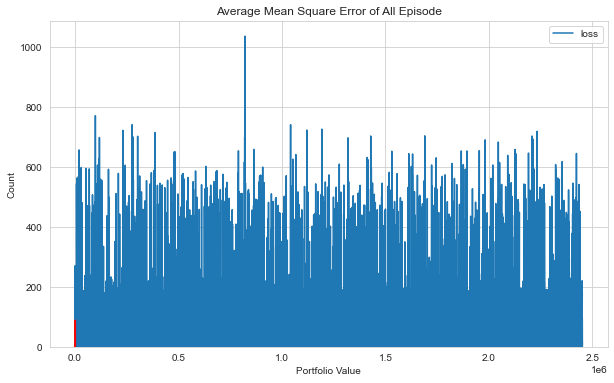

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

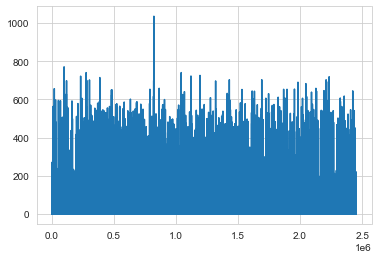

In [5]:
plt.plot(agent.model.losses)

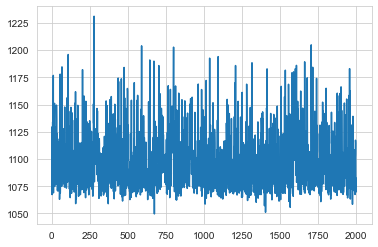

In [6]:
plt.plot(portfolio_value)

episode end value: 1385.67, duration: 0:00:00.185374
Sell: 346 times, Buy: 281 times


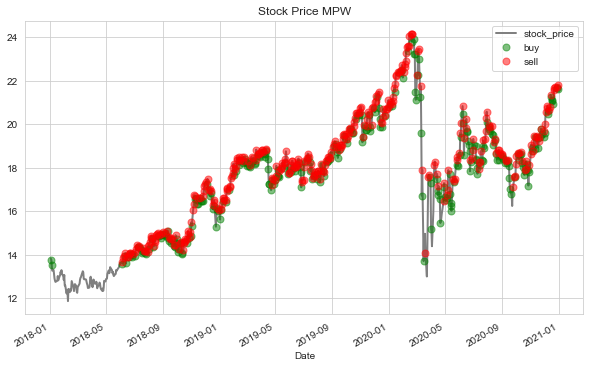

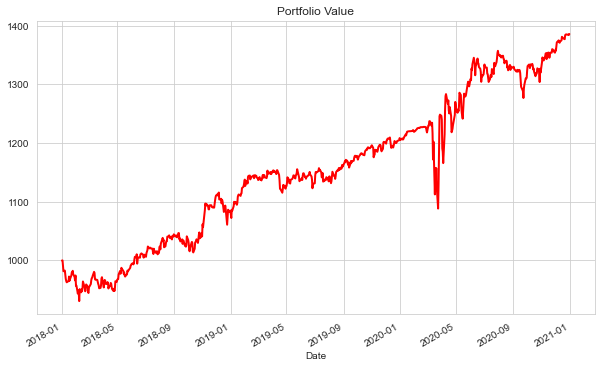

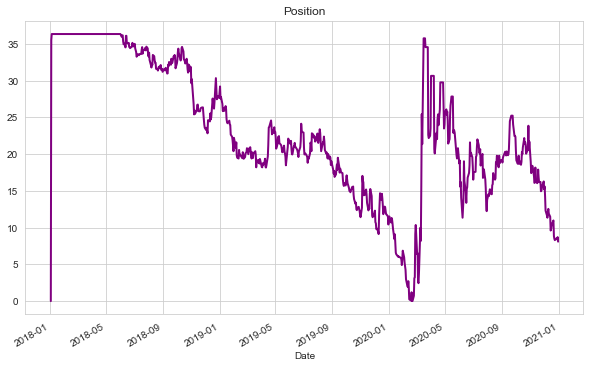

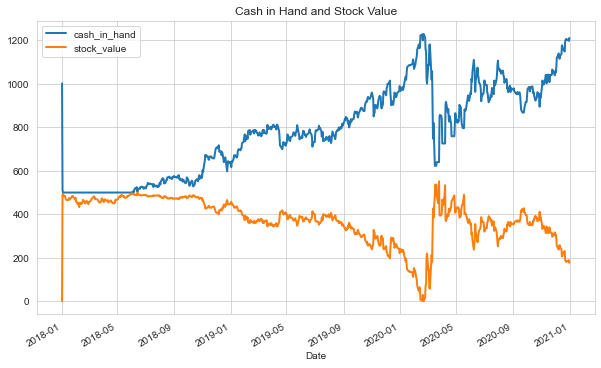

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: MPW
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 11.49 %
Volatility: 0.1264
shape ratio: 0.8220
Maximun drawdown: -12.03 %
Calmar ratio: 0.9546
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 16.36 %
Volatility (benchmark): 0.3676
shape ratio: 0.4152
Maximun drawdown: -46.13 %
Calmar ratio (benchmark): 0.3547


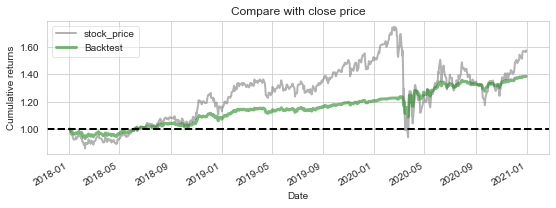

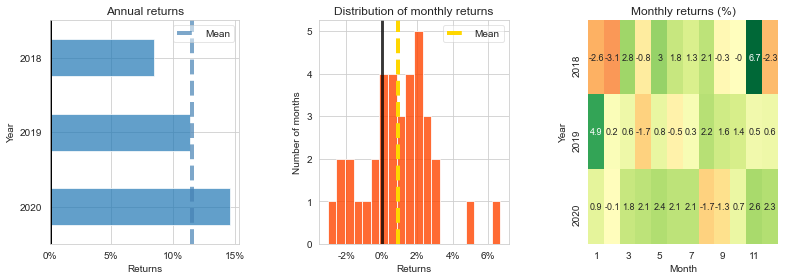

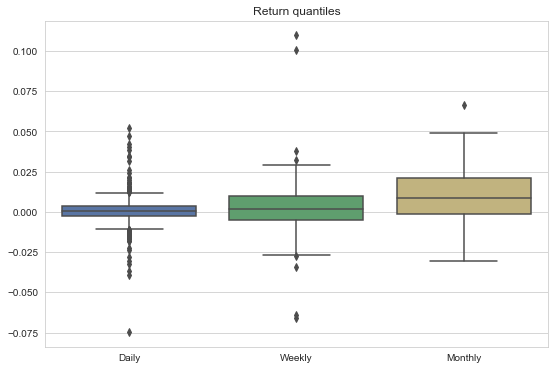

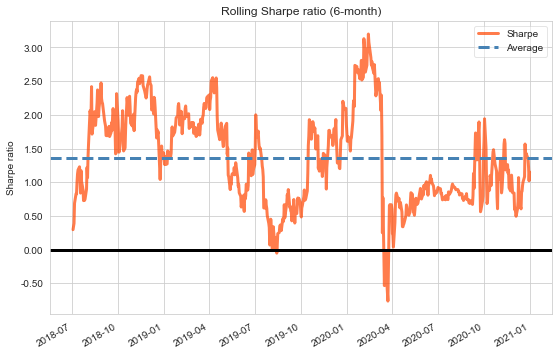

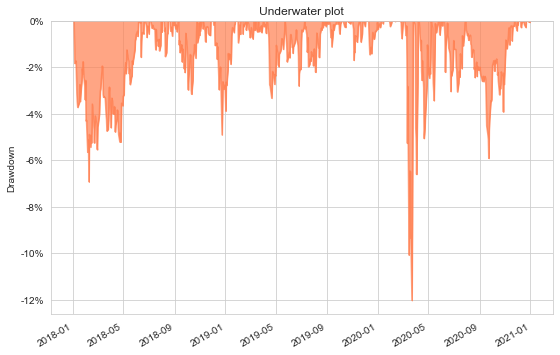

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')